# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect('db/Market.db')

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(ProductName)
        FROM Products
        WHERE Price < 10

""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT country, COUNT(country) as Count
        FROM Suppliers
        GROUP BY country
        ORDER BY Count DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


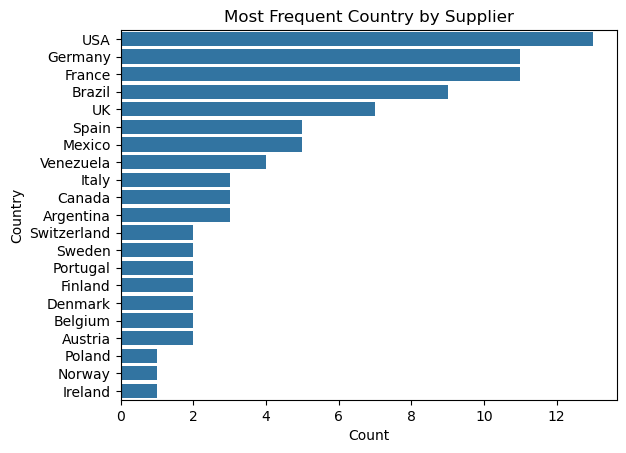

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', "Count"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Country", x='Count' )
plt.title('Most Frequent Country by Supplier')
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [14]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
             SELECT country, COUNT(CustomerName) as count
               FROM Customers
               GROUP BY country
               ORDER BY count DESC
               """)

# TODO: Fetch your list of tuples and print it out
rows= cursor.fetchall()
rows

[('USA', 13),
 ('Germany', 11),
 ('France', 11),
 ('Brazil', 9),
 ('UK', 7),
 ('Spain', 5),
 ('Mexico', 5),
 ('Venezuela', 4),
 ('Italy', 3),
 ('Canada', 3),
 ('Argentina', 3),
 ('Switzerland', 2),
 ('Sweden', 2),
 ('Portugal', 2),
 ('Finland', 2),
 ('Denmark', 2),
 ('Belgium', 2),
 ('Austria', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Ireland', 1)]

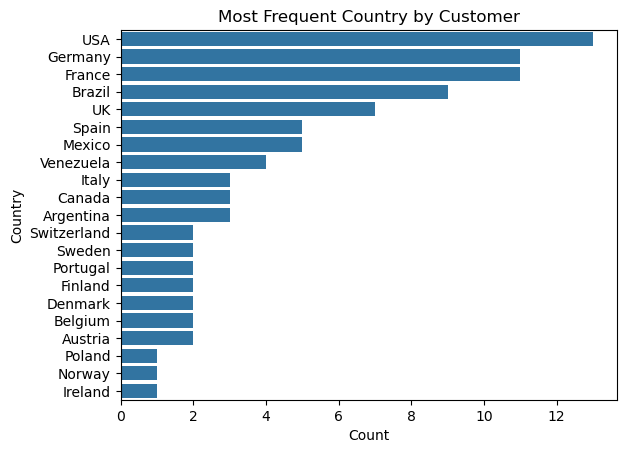

In [24]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Country", x='Count' )
plt.title('Most Frequent Country by Customer')
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [32]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
               SELECT p.ProductName, COUNT(o.quantity) AS count
               FROM OrderDetails o 
               LEFT JOIN Products p ON p.productId = o.productId
               GROUP BY p.ProductName
               ORDER BY count
               LIMIT 20
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Chocolade', 1),
 ('Laughing Lumberjack Lager', 1),
 ('Mishi Kobe Niku', 1),
 ('Røgede sild', 1),
 ('Aniseed Syrup', 2),
 ('Genen Shouyu', 2),
 ("Grandma's Boysenberry Spread", 2),
 ("Gustaf's Knäckebröd", 2),
 ('Louisiana Hot Spiced Okra', 2),
 ('Northwoods Cranberry Sauce', 2),
 ('Queso Manchego La Pastora', 2),
 ('Röd Kaviar', 2),
 ("Sirop d'érable", 2),
 ("Uncle Bob's Organic Dried Pears", 2),
 ('Filo Mix', 3),
 ('Gravad lax', 3),
 ('Mascarpone Fabioli', 3),
 ('Schoggi Schokolade', 3),
 ('Valkoinen suklaa', 3),
 ('Zaanse koeken', 3)]

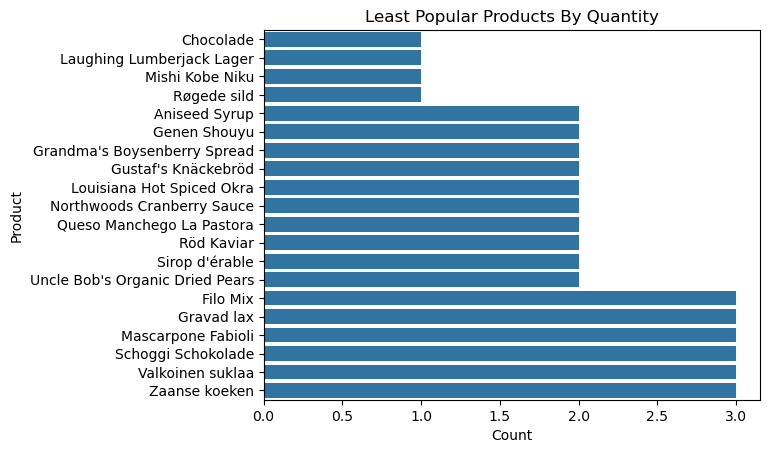

In [34]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Product', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Product", x='Count' )
plt.title('Least Popular Products By Quantity')
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [37]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
              SELECT p.ProductName, COUNT(o.quantity)*p.price AS revenue
               FROM OrderDetails o 
               LEFT JOIN Products p ON p.productId = o.productId
               GROUP BY p.ProductName
               ORDER BY revenue
               LIMIT 20
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Røgede sild', 9.5),
 ('Chocolade', 12.75),
 ('Laughing Lumberjack Lager', 14),
 ('Aniseed Syrup', 20),
 ('Filo Mix', 21),
 ('Geitost', 22.5),
 ('Zaanse koeken', 28.5),
 ('Röd Kaviar', 30),
 ('Genen Shouyu', 31.0),
 ('Louisiana Hot Spiced Okra', 34),
 ('Tunnbröd', 36),
 ("Gustaf's Knäckebröd", 42),
 ('Konbu', 42),
 ('Valkoinen suklaa', 48.75),
 ('Guaraná Fantástica', 49.5),
 ("Grandma's Boysenberry Spread", 50),
 ('Escargots de Bourgogne', 53.0),
 ('NuNuCa Nuß-Nougat-Creme', 56),
 ("Sirop d'érable", 57.0),
 ("Uncle Bob's Organic Dried Pears", 60)]

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Product', 'Revenue'])

# TODO: Generate a visualization on this dataframe
...

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]